In [1]:
# WeatherPy, an analysis of cities across the globe, selected at random to determine if there is a relationship between latitude and various weather related metrics. Powered by Open Weather API.
# By Matt Taylor

In [2]:
# Importing dependencies
import json
import requests
from citipy import citipy
import random
from config import api_key
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [3]:
# Create an empty list to store random cities
city_list = []

# Creating a conditional loop which will continue to generate random numbers and search for cities until a specified amount of unique cities are found
while len(city_list) < 750:
    # Select a random latitude and longitude
    ran_lat = random.uniform(-1.8, 1.8) * 100
    ran_long = random.uniform(-1.8, 1.8) * 100

    # Using the Citipy module, find the nearest city for the given co-ordinates
    ran_city = citipy.nearest_city(ran_lat, ran_long)
    
    # If the city found is unique, add it to our list of cities
    if not ran_city.city_name in city_list:
        city_list.append(ran_city.city_name)

# Confirming the size of the list and therefore the number of unique cities found
print(f"Number of unique cities found is: {len(city_list)}")

Number of unique cities found is: 750


In [4]:
# Create a dataframe to store data from upcoming API calls
city_df = pd.DataFrame(city_list)
city_df.columns = ["City"]

# Adding empty placeholder columns
city_df["Lat"] = ""
city_df["Lng"] = ""
city_df["Max Temp"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""
city_df["Country"] = ""
city_df["Date"] = ""

# Previewing the dataframe
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,,,,,,,,
1,kaitangata,,,,,,,,
2,ushuaia,,,,,,,,
3,pouembout,,,,,,,,
4,mataura,,,,,,,,


In [5]:
# Call the Open Weather API to search each city and populate the dataframe with information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

print("Beginning Data Retreival")
print("-----------------------------")

for index, city in city_df.iterrows():
    
    # Take the city name from the current row, stored in the column "City" and build the endpoint URL
    city_name = city["City"]
    query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + city_name

    # Try query the API endpoint, if the city is found, append the data we are looking for to the current row of the dataframe
    try:
        response = requests.get(query_url)
        city_data = response.json()

        # Store the latitude and longitude
        city_df.loc[index, "Lat"] = city_data["coord"]["lat"]
        city_df.loc[index, "Lng"] = city_data["coord"]["lon"]
    
        # Store the maximum temperature
        city_df.loc[index, "Max Temp"] = city_data["main"]["temp_max"]

        # Store the humidity
        city_df.loc[index, "Humidity"] = city_data["main"]["humidity"]

        # Store the cloudiness
        city_df.loc[index, "Cloudiness"] = city_data["clouds"]["all"]

        # Store the wind speed
        city_df.loc[index, "Wind Speed"] = city_data["wind"]["speed"]

        # Store the country
        city_df.loc[index, "Country"] = city_data["sys"]["country"]

        # Store the date
        city_df.loc[index, "Date"] = city_data["dt"]

        # Acknowledge that all of the records have been collected and print a confirmation
        print(f"Processing Record {index + 1} | {city_name}")
        
    except:
        # If the API endpoint cannot be found, skip that particular row/city
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retreival
-----------------------------
Processing Record 1 | busselton
Processing Record 2 | kaitangata
Processing Record 3 | ushuaia
Processing Record 4 | pouembout
Processing Record 5 | mataura
Processing Record 6 | qaanaaq
Processing Record 7 | sakakah
Processing Record 8 | acarau
Processing Record 9 | barrow
Processing Record 10 | tuktoyaktuk
City not found. Skipping...
Processing Record 12 | pevek
Processing Record 13 | rikitea
Processing Record 14 | saravena
Processing Record 15 | albany
Processing Record 16 | punta arenas
Processing Record 17 | dikson
Processing Record 18 | labuhan
Processing Record 19 | new norfolk
City not found. Skipping...
Processing Record 21 | severo-kurilsk
City not found. Skipping...
Processing Record 23 | hobart
Processing Record 24 | sawtell
Processing Record 25 | port alfred
Processing Record 26 | hashtrud
Processing Record 27 | mehamn
Processing Record 28 | castro
City not found. Skipping...
Processing Record 30 | bredasdorp
Processin

In [6]:
# For the rows where the city data was not found, drop those rows from the dataframe
NaN = float("NaN")
city_df.replace("", NaN, inplace=True)
city_df.dropna(subset = ["Lat"], inplace=True)

# Export dataframe to a CSV
path = "output/city_data.csv"
city_df.to_csv(path, index=False)

# Preview the dataframe created for our analysis
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.65,115.33,61.00,88.0,100.0,1.01,AU,1.601177e+09
1,kaitangata,-46.28,169.85,45.00,68.0,57.0,15.01,NZ,1.601177e+09
2,ushuaia,-54.80,-68.30,35.60,93.0,40.0,13.87,AR,1.601177e+09
3,pouembout,-21.13,164.90,79.68,67.0,50.0,7.85,NC,1.601177e+09
4,mataura,-46.19,168.86,46.99,65.0,92.0,15.01,NZ,1.601177e+09


In [7]:
# Using describe to quickly look at the summary statistics, we can determine there are no cities with >100% humidity by the max value in the humidity column
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,6.840000e+02
mean,21.438436,26.287924,64.430658,71.926901,47.801170,7.919035,1.601177e+09
std,32.221312,89.127617,15.334800,19.712515,39.728452,5.081973,7.107570e+01
min,-54.800000,-179.170000,12.650000,11.000000,0.000000,0.450000,1.601177e+09
25%,-4.022500,-53.705000,51.602500,61.000000,1.000000,4.060000,1.601177e+09
50%,25.170000,31.140000,66.200000,76.000000,40.000000,6.930000,1.601177e+09
75%,49.055000,105.342500,77.000000,87.000000,90.000000,11.010000,1.601177e+09
max,78.220000,179.320000,95.000000,100.000000,100.000000,38.880000,1.601177e+09


## Plotting the data

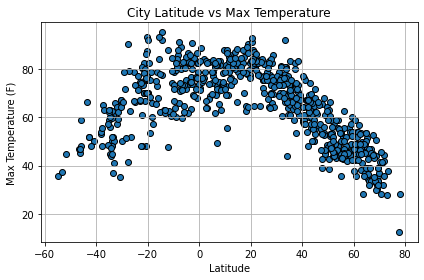

In [8]:
# Plotting the data of latitude vs max temperature
x_values = city_df["Lat"]
y_values = city_df["Max Temp"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig1.png")
plt.show()

### Latitude vs Max Temperature
* By simply looking at the plot generated, it appears that there is a correlation between latitude and max temperature
* The max temperature tends to reach it's maximum as latitude approaches 0 (the equator) which we would expect

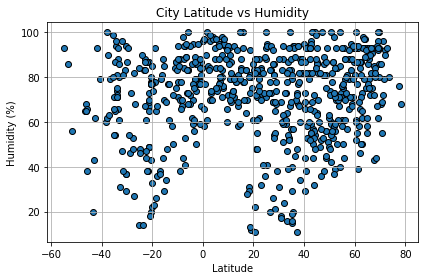

In [9]:
# Plotting the data of latitude vs humidity
y_values = city_df["Humidity"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig2.png")
plt.show()

### Latitude vs Humidity
* There does not appear to be a relationship between latitude and humidity
* We are plotting relative humidity, which normalises the effect temperature has on absolute humidity, therefore it makes sense to see no relationship in the plot

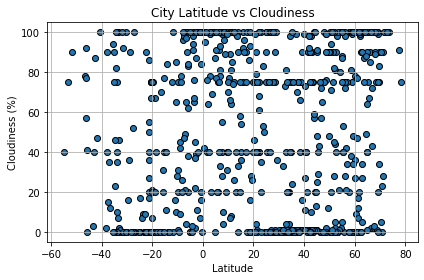

In [10]:
# Plotting the data of latitude vs cloudiness
y_values = city_df["Cloudiness"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig3.png")
plt.show()

### Latitude vs Cloudiness
* There does not appear to be a relationship between latitude and cloudiness in this dataset
* According to the Wikipedia page for cloud cover (cloudiness), there shoud be a weak relationship showing that cloudiness is lower around the equator
* However, it is also true that cloudiness is highly variable, it could be true that there was no observable relationship at the timepoint selected
* https://en.wikipedia.org/wiki/Cloud_cover

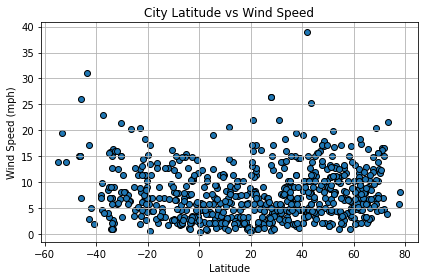

In [11]:
# Plotting the data of latitude vs wind speed
y_values = city_df["Wind Speed"]

plt.scatter(x_values,y_values, edgecolors = "black")

plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()
plt.tight_layout()

plt.savefig("output/Fig4.png")
plt.show()

### Latitude vs Wind Speed
* There does not appear to be a relationship between latitude and wind speed
* According to the Wikipedia page for wind speed, there are significantly more factors than simply latitude (or temperature) in determining wind speed, therefore it makes sense that we see little to no relationship
* https://en.wikipedia.org/wiki/Wind_speed

## Linear Regression

In [12]:
# Seperating the dataframe into Northern and Southern hemisphere
north_hem_df = city_df.loc[city_df["Lat"] >= 0, :]
south_hem_df = city_df.loc[city_df["Lat"] < 0, :]

In [13]:
# Defining a function to gather the outputs of the linear regression to be re-used for the upcoming analysis
def lin_regress(x, y):
    (slope, intercept, r, p, stderr) = st.linregress(x, y)
    line_eq = slope * x + intercept
    line_str = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return [r, line_eq, line_str]


The r-squared value is: 0.7226928010574568



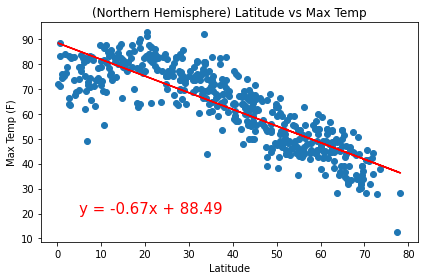

In [14]:
# Plotting the data of latitude vs max temperature for only the Northern Hemisphere, and performing a linear regression
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(5, 20),fontsize=15,color="red")

plt.title("(Northern Hemisphere) Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()


The r-squared value is: 0.44377146583634075



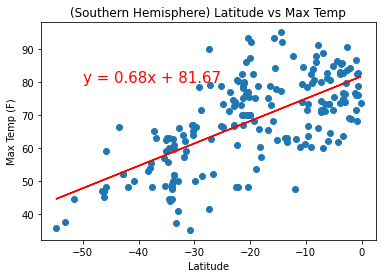

In [15]:
# Plotting the data of latitude vs max temperature for only the Southern Hemisphere, and performing a linear regression
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Max Temp"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(-50, 80),fontsize=15,color="red")

plt.title("(Southern Hemisphere) Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Displaying the results
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()

### Latitude vs Max Temp (Northern vs Southern Hemisphere)
* When splitting the latitude data by hemisphere, we can see the two linear relationships which contribute to the overall parabolic relationship observed previously in this analysis
* The Northern hemisphere data shows a strong negative correlation, while the Southern hemisphere data shows a strong positive correlation as the cities move further away from the equator in either direction


The r-squared value is: 5.945500474739078e-05



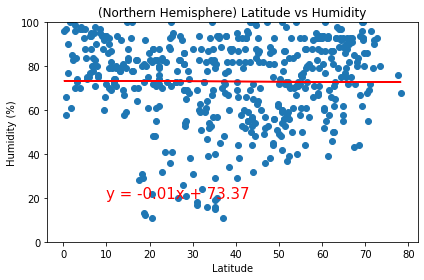

In [16]:
# Plotting the data of latitude vs humidity for only the Northern Hemisphere, and performing a linear regression
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(10, 20),fontsize=15,color="red")

plt.title("(Northern Hemisphere) Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 100)

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()


The r-squared value is: 0.024991535323057586



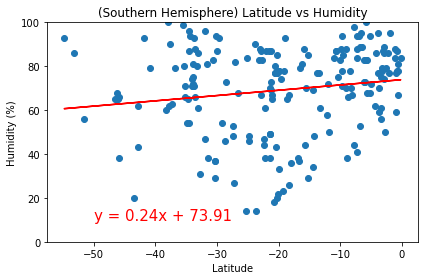

In [17]:
# Plotting the data of latitude vs humidity for only the Southern Hemisphere, and performing a linear regression
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(-50 ,10),fontsize=15,color="red")

plt.title("(Southern Hemisphere) Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 100)

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()

### Latitude vs Humidity (Northern vs Southern Hemisphere)
* Similar to the previous analysis, there appears to be little to no relationship between the variables latitude and humidity
* This is mainly because the measure of humidity used is relative humidity, rather than absolute humidity
* Splitting the data into the Northern and Southern hemispheres does not show any further relationships and suggests that latitude has no bearing on relative humidity


The r-squared value is: 0.0003659032949388996



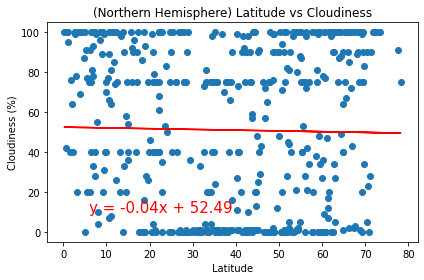

In [18]:
# Plotting the data of latitude vs cloudiness for only the Northern Hemisphere, and performing a linear regression
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(6,10),fontsize=15,color="red")

plt.title("(Northern Hemisphere) Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()


The r-squared value is: 0.018466900054618093



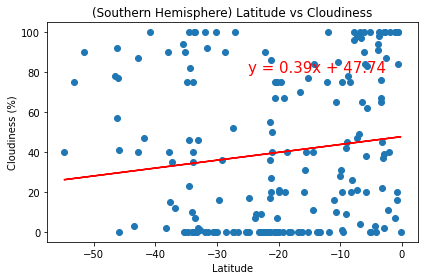

In [19]:
# Plotting the data of latitude vs cloudiness for only the Northern Hemisphere, and performing a linear regression
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(-25, 80),fontsize=15,color="red")

plt.title("(Southern Hemisphere) Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()

### Latitude vs Cloudiness (Northern vs Southern Hemisphere)
* Similar to the previous analysis, there appears to be little to no relationship between latitude and cloudiness
* Even after splitting the data into Northern and Southern, we still cannot observe a decrease in cloudiness around the equator


The r-squared value is: 0.04245735885607902



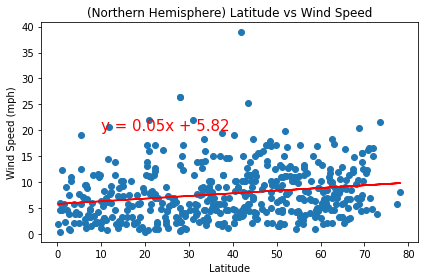

In [20]:
# Plotting the data of latitude vs wind speed for only the Northern Hemisphere, and performing a linear regression
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind Speed"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(10, 20),fontsize=15,color="red")

plt.title("(Northern Hemisphere) Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()


The r-squared value is: 0.10214377645793928



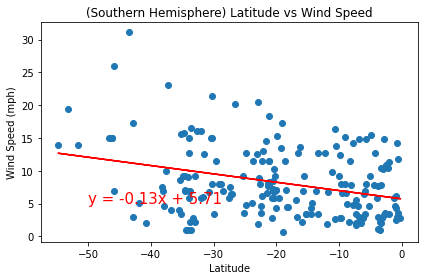

In [21]:
# Plotting the data of latitude vs wind speed for only the Southern Hemisphere, and performing a linear regression
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind Speed"]

# Using a pre-defined function to return only the values we need from the linear regression
r = lin_regress(x_values, y_values)[0]
line_eq = lin_regress(x_values, y_values)[1]
line_str = lin_regress(x_values, y_values)[2]

# Creating the scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,line_eq, c="red")
plt.annotate(line_str,(-50, 5),fontsize=15,color="red")

plt.title("(Southern Hemisphere) Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Displaying the results
plt.tight_layout()
print(f"\nThe r-squared value is: {r**2}\n")
plt.show()

### Latitude vs Wind Speed (Northern vs Southern Hemisphere)
* Similar to the previous analysis, there appears to be little to no relationship between latitude and wind speed
* Splitting the data into the Northern and Southern hemispheres does not show any further relationships and suggests that latitude has little to no bearing on wind speed